In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
data = []
with open('C:/Users/TO THANH/OneDrive/Máy tính/hôm nay/university.data', 'r') as file:
    university = {}
    for line in file:
        if '(def-instance' in line:
            university = {'name': line.split()[1]}
        elif '))' in line:
            data.append(university)
            university = {}
        else:
            matches = re.findall('\((.*?)\)', line)
            if matches:
                split_data = matches[0].split(None, 1)
                if len(split_data) == 2:
                    attribute, value = split_data
                    university[attribute] = value
df = pd.DataFrame(data)
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column].astype(str))

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df.drop('name', axis=1), df['name'], test_size=0.2, random_state=42)

# Tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình
knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test)

# Đánh giá chất lượng của mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

# In báo cáo phân loại 
print(classification_report(y_test, y_pred))

# Định nghĩa các tham số cho mô hình KNN
parameters = {'n_neighbors':[3, 5, 7], 'weights':('uniform', 'distance'), 'metric':('euclidean', 'manhattan')}

# Tạo mô hình KNN
knn = KNeighborsClassifier()

# Tìm kiếm lưới để tìm tham số tốt nhất
clf = GridSearchCV(knn, parameters)

# Huấn luyện mô hình
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)
# Định nghĩa các tham số cho mô hình KNN
parameters = {'n_neighbors':[3, 5, 7], 'weights':('uniform', 'distance'), 'metric':('euclidean', 'manhattan')}

# Tạo mô hình KNN
knn = KNeighborsClassifier()

# Tìm kiếm lưới để tìm tham số tốt nhất
clf = GridSearchCV(knn, parameters)

# Huấn luyện mô hình
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)
best_classifier = clf.best_estimator_
print("The best method is:", best_classifier)

parameters = {'n_neighbors':[3, 5, 7], 'weights':('uniform', 'distance'), 'metric':('euclidean', 'manhattan')}
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
print("The best method is:", clf.best_params_)

Accuracy: 0.3076923076923077
Recall: 0.0625
Precision: 0.0625
F1 Score: 0.0625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         1
          46       1.00      1.00      1.00         4

 

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

The best method is: KNeighborsClassifier(metric='euclidean', n_neighbors=3)


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The best method is: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


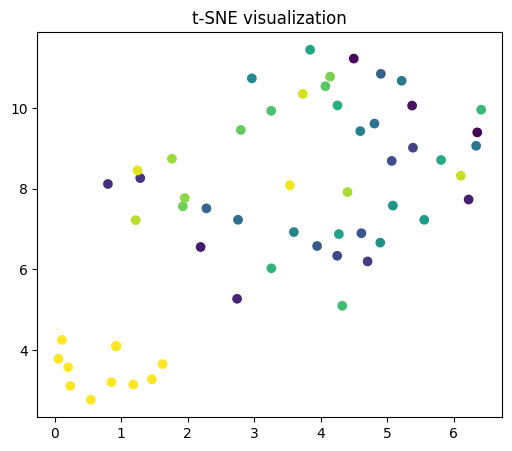

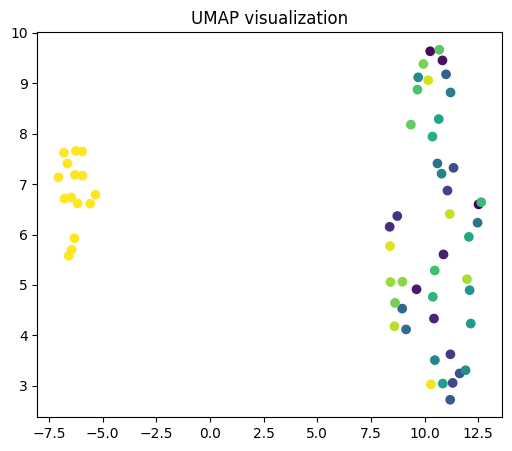

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Định nghĩa các tham số cho mô hình KNN
parameters = {'n_neighbors':[3, 5, 7], 'weights':('uniform', 'distance'), 'metric':('euclidean', 'manhattan')}

# Tạo mô hình KNN
knn = KNeighborsClassifier()

# Tìm kiếm lưới để tìm tham số tốt nhất
clf = GridSearchCV(knn, parameters)

# Huấn luyện mô hình
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Tạo mô hình t-SNE và UMAP
tsne = TSNE(n_components=2, random_state=42)
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)

# Huấn luyện mô hình và biến đổi dữ liệu
tsne_results = tsne.fit_transform(df.drop('name', axis=1))
umap_results = umap_model.fit_transform(df.drop('name', axis=1))

# Trực quan hóa kết quả t-SNE
plt.figure(figsize=(6,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['name'])
plt.title('t-SNE visualization')
plt.show()

# Trực quan hóa kết quả UMAP
plt.figure(figsize=(6,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=df['name'])
plt.title('UMAP visualization')
plt.show()



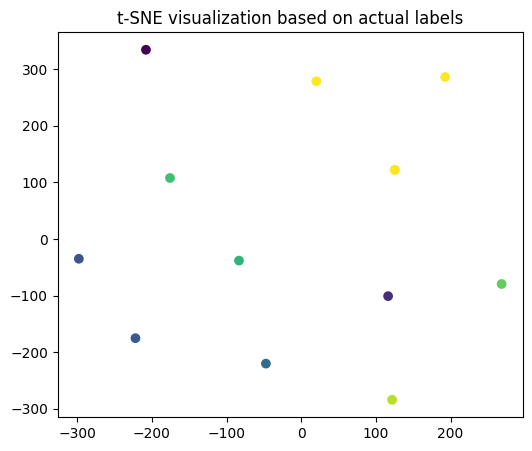

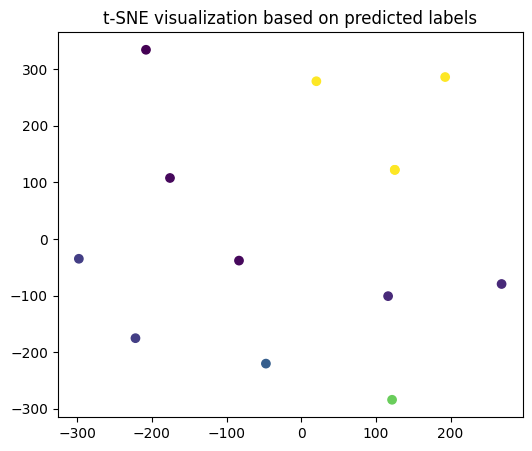

In [13]:
# Tạo mô hình t-SNE với perplexity thấp hơn
tsne = TSNE(n_components=2, random_state=42, perplexity=10)  # Giả sử số lượng mẫu của bạn là 10

# Huấn luyện mô hình và biến đổi dữ liệu
tsne_results = tsne.fit_transform(X_test)

# Trực quan hóa kết quả t-SNE dựa trên nhãn thực tế
plt.figure(figsize=(6,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_test)
plt.title('t-SNE visualization based on actual labels')
plt.show()

# Trực quan hóa kết quả t-SNE dựa trên nhãn dự đoán
plt.figure(figsize=(6,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_pred)
plt.title('t-SNE visualization based on predicted labels')
plt.show()